In [1]:
import uproot as uproot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import sys
import h5py

In [2]:
sys.path.append("/home/surajrai1900/IWCD_ParticleGun-analysis")

In [3]:
import create_file
import utils
from Classification_model import run_model

In [4]:
df = create_file.relevant_df()

/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in true_divide
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in true_divide
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:3

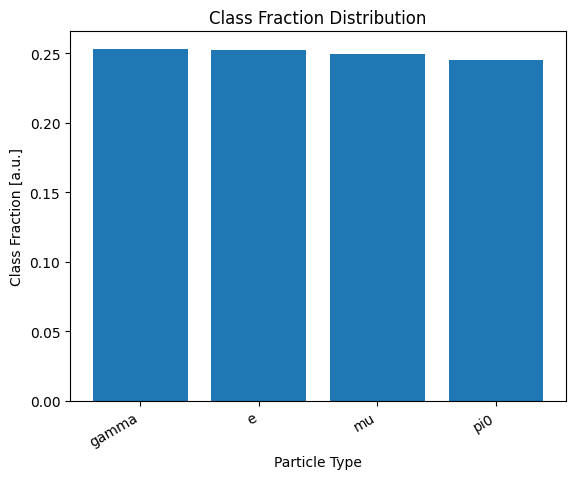

<Figure size 640x480 with 0 Axes>

In [5]:
# Plotting Class fraction for data before applying basic cuts

utils.plot_class_frac(df)

In [6]:
# Applying basic cuts to the data

df_base = df[utils.return_basic_cuts(df)]

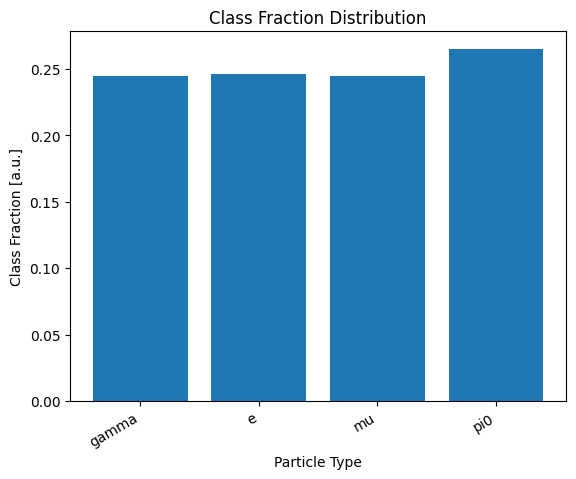

<Figure size 640x480 with 0 Axes>

In [7]:
# Plotting class fraction after applyig basic cuts

utils.plot_class_frac(df_base)

#### The relative class fraction should increase for electron signal events after basic cuts but it seems that the pi0 class fraction increases instead.

## e/pi0 seperation comparison between FiTQun, ResNet, and Classification_model

In [8]:
fq_epi0_cuts = utils.return_fq_epi0_cuts(df_base)
ml_epi0_cuts = utils.return_ml_epi0_cuts(df_base)

Using gbdt model


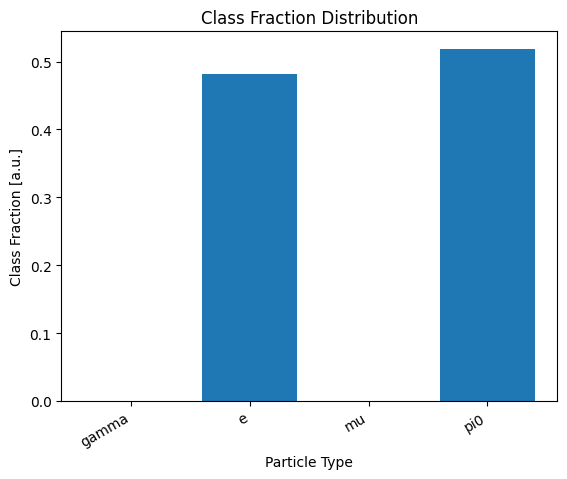

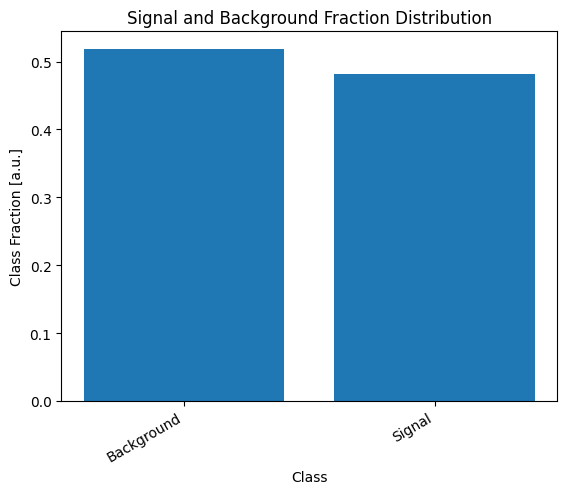

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/surajrai1900/IWCD_ParticleGun-analysis/Classification_model.py:19: RuntimeWarning: invalid value encountered in double_scalars
  mod_f1 = (1 + w) * (prec * rec) / (w * prec + rec)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/surajrai1900/IWCD_ParticleGun-analysis/Classification_model.py:19: RuntimeWarning: invalid value encountered in double_scalars
  mod_f1 = (1 + w) * (prec * rec) / (w * prec + rec)
/usr/local/lib/python3.8/dist-packages/sklearn/m

 The best threshold is : 0.40909090909090906


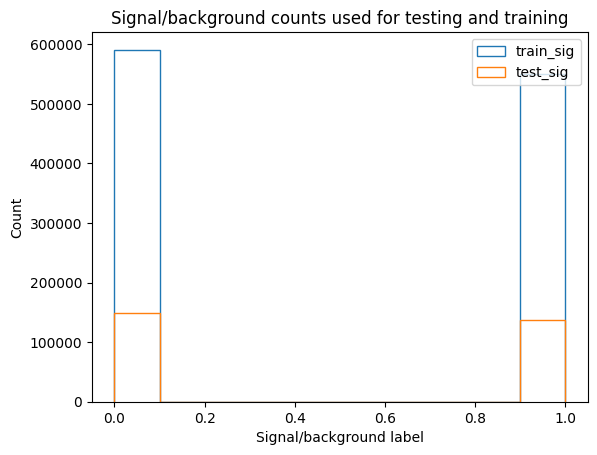

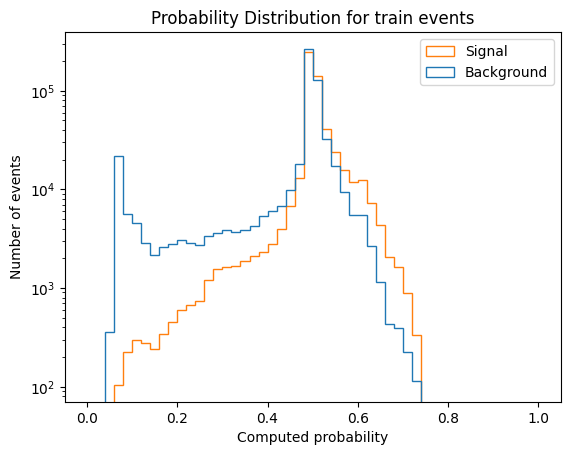

The train accuracy is:0.5386337390535766
The train f1 is:0.6691837059326887
The train precision is:0.5112541706575925
The train recall is:0.9682963663822122


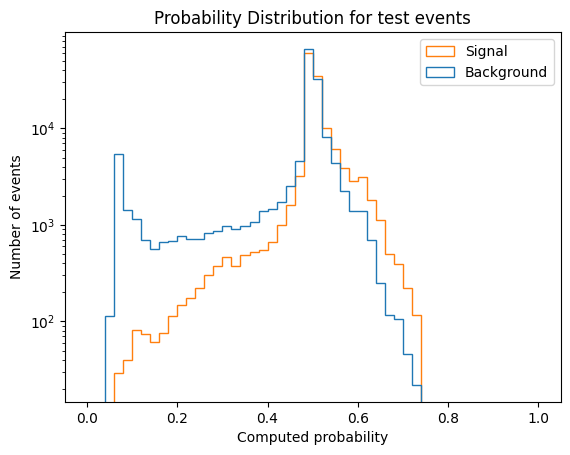

The test accuracy is:0.5369242154809881
The test f1 is:0.667387174952512
The test precision is:0.5091601703645617
The test recall is:0.9682953930727956
{'pi0/e_likelihood ratio': 1.1714643832831094e-05, 'reco_electron_mom': 0.6476318669059807, 'reco_electron_dwall': 0.007950443244915355, 'reco_electron_towall': 0.1390151679890301, 'pi0_mass': 0.20539080721624098}


/home/surajrai1900/IWCD_ParticleGun-analysis/Classification_model.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name + '_sig'] = 0


<Figure size 640x480 with 0 Axes>

In [9]:
# Using only FiTQun variables for training and testing the model

run_model(df_base, train_col=['pi0/e_likelihood ratio', 'reco_electron_mom', 'reco_electron_dwall', 'reco_electron_towall', 'true_sig', 'pi0_mass'], train_labels = [1, 3])

In [10]:
gbdt_fqepi0_cuts = (df_base['gbdt_sig'].astype(bool))

In [11]:
print(f' Selection Efficiency and background rejection for fitqun cuts is : {utils.sg_eff(df_base, fq_epi0_cuts, 1)} , {utils.bg_rej(df_base, fq_epi0_cuts, 3)}')
print(f' Selection Efficiency and background rejection for softmax cuts is : {utils.sg_eff(df_base, ml_epi0_cuts, 1)} , {utils.bg_rej(df_base, ml_epi0_cuts, 3)}')
print(f" Selection Efficiency and background rejection for gbdt cuts is : {utils.sg_eff(df_base, gbdt_fqepi0_cuts, 1)} , {utils.bg_rej(df_base, gbdt_fqepi0_cuts, 3)}")

 Selection Efficiency and background rejection for fitqun cuts is : 0.7336622065782419 , 0.8173486947486904
 Selection Efficiency and background rejection for softmax cuts is : 0.9536440243362316 , 0.9126017360058877
 Selection Efficiency and background rejection for gbdt cuts is : 0.9682961724049511 , 0.13899411229923375


In [12]:
print(f'Precision, recall and f1_score for fitqun cuts is : {utils.f1(df_base, fq_epi0_cuts, 1, 3)}')
print(f'Precision, recall and f1_score for softmax cuts is : {utils.f1(df_base, ml_epi0_cuts, 1, 3)}')
print(f'Precision, recall and f1_score for gbdt cuts is : {utils.f1(df_base, gbdt_fqepi0_cuts, 1, 3)}')

Precision, recall and f1_score for fitqun cuts is : (0.7885791062726282, 0.7336622065782419, 0.7601300559711631)
Precision, recall and f1_score for softmax cuts is : (0.9101711978286019, 0.9536440243362316, 0.931400616981798)
Precision, recall and f1_score for gbdt cuts is : (0.5108354707079122, 0.9682961724049511, 0.6688248923864176)


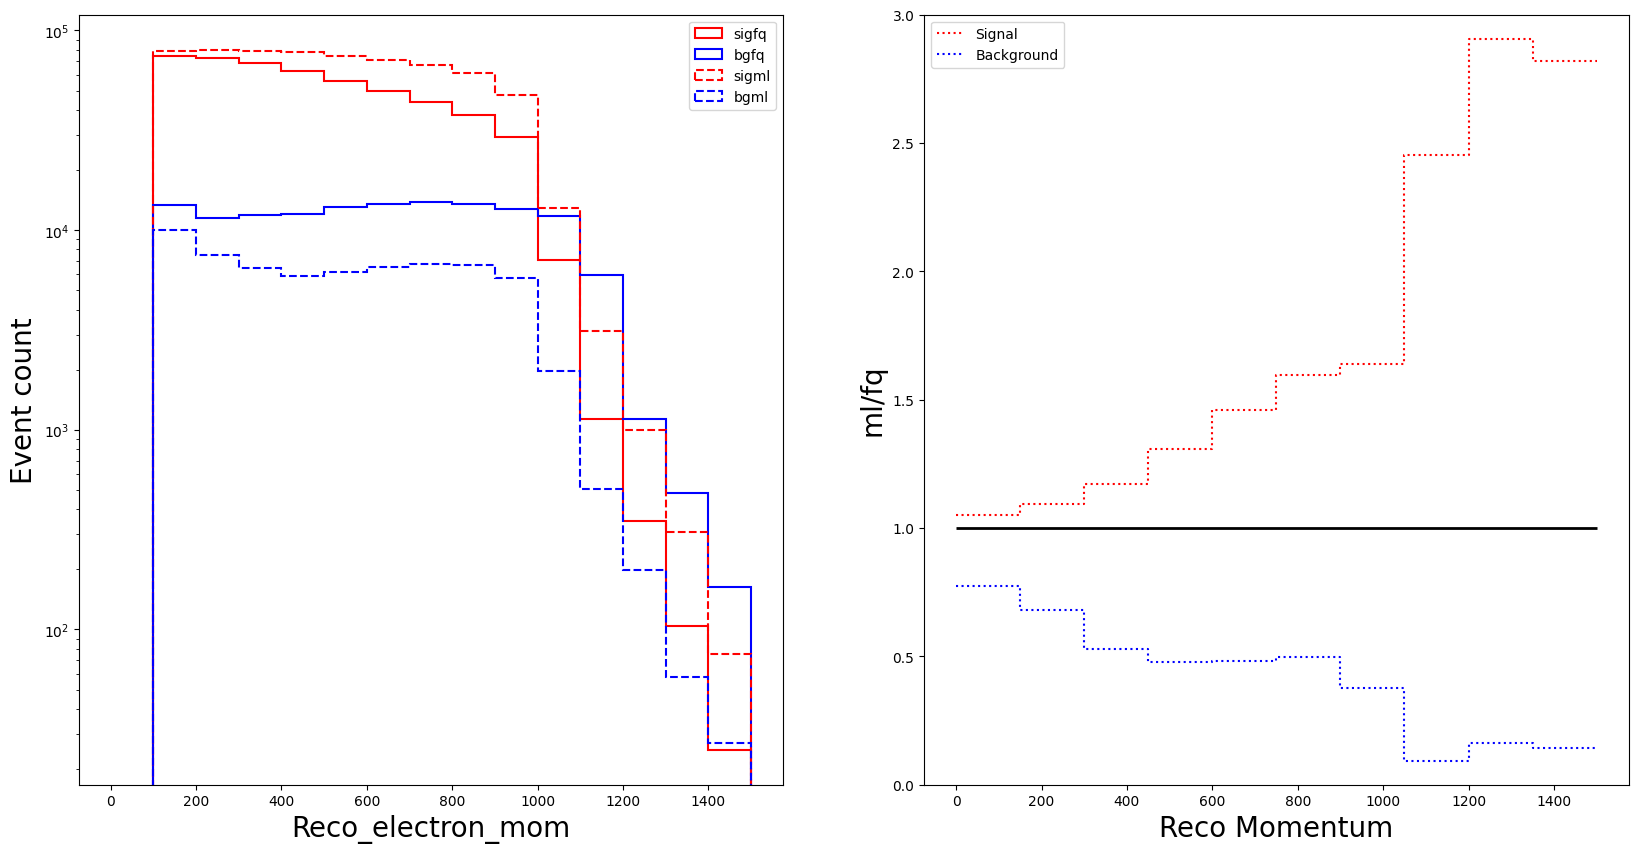

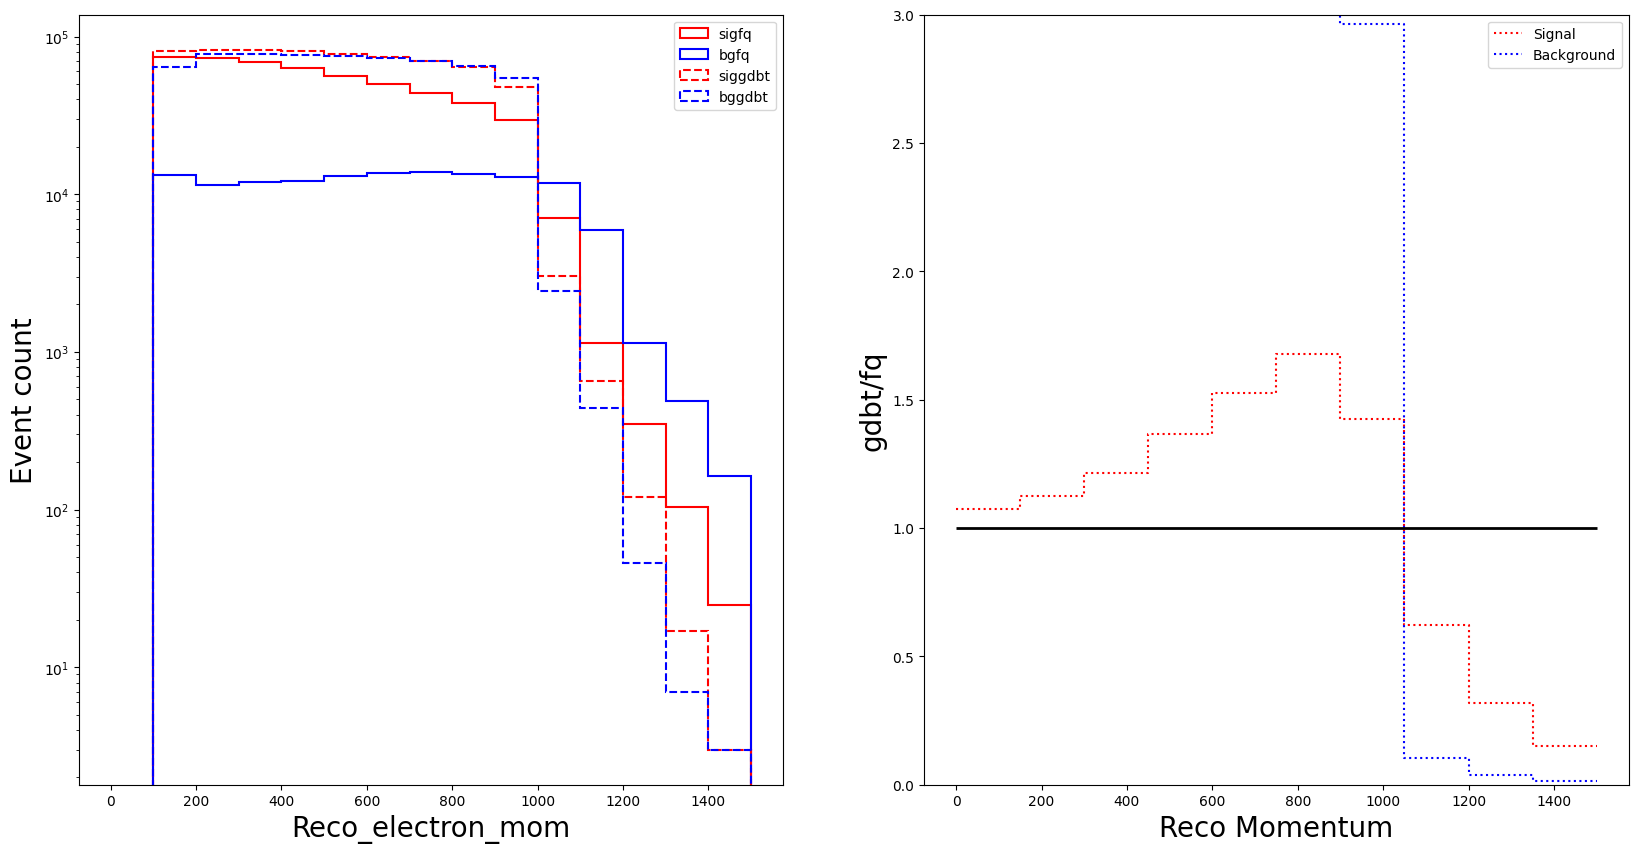

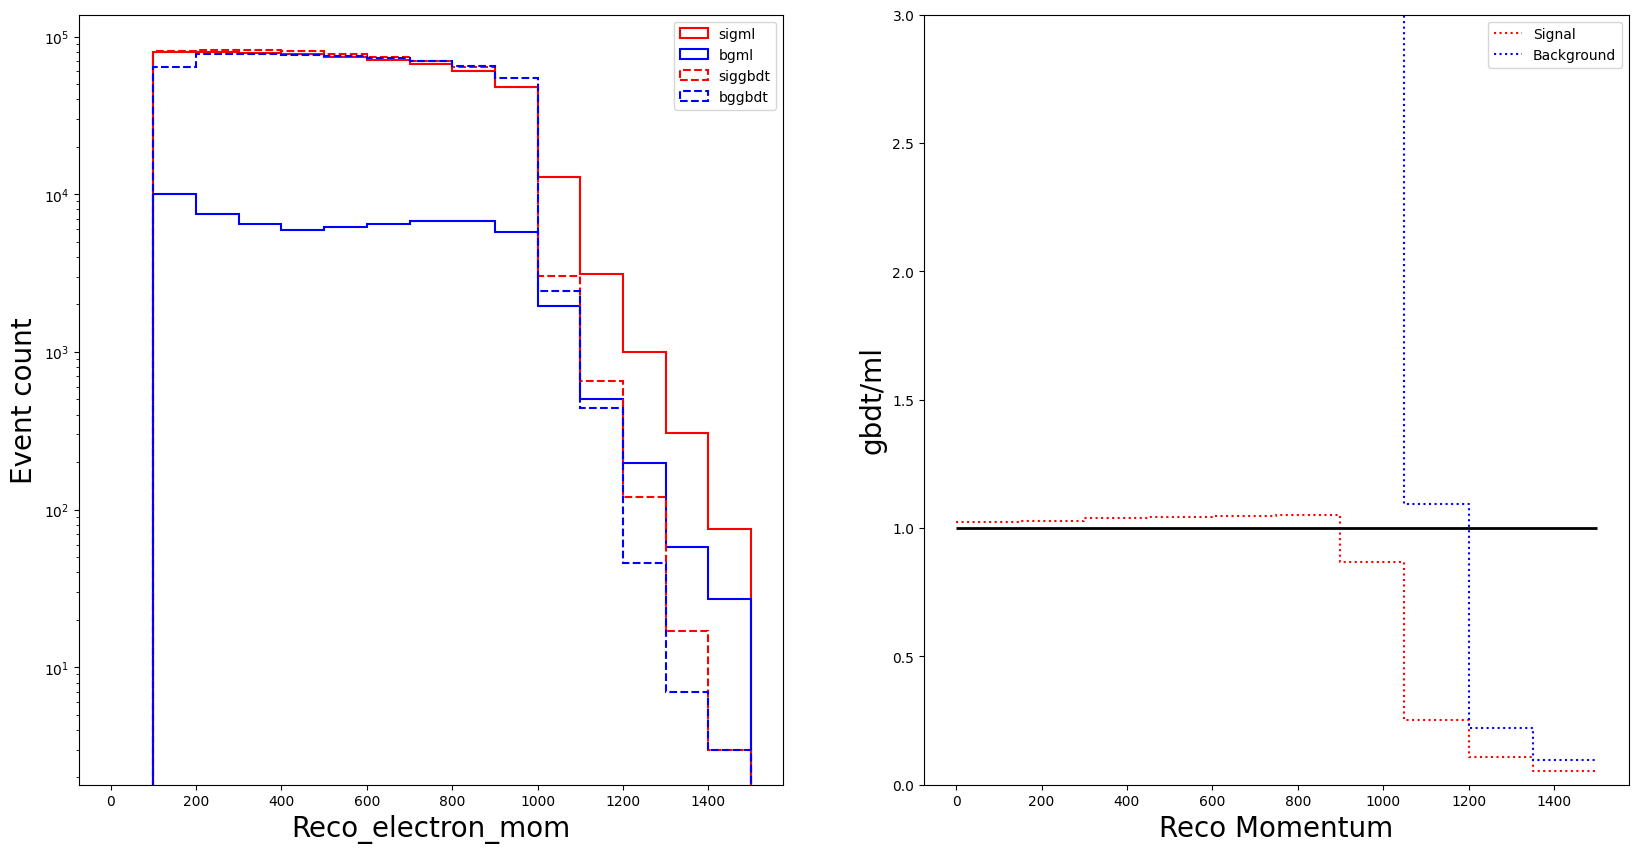

(<Figure size 2000x1000 with 2 Axes>,
 array([<AxesSubplot: xlabel='Reco_electron_mom', ylabel='Event count'>,
        <AxesSubplot: xlabel='Reco Momentum', ylabel='gbdt/ml'>],
       dtype=object))

In [13]:
utils.plot_sel_comp(df_base, 1, 3, fq_epi0_cuts, ml_epi0_cuts, 'fq', 'ml')
utils.plot_sel_comp(df_base, 1, 3, fq_epi0_cuts, gbdt_fqepi0_cuts, 'fq', 'gdbt')
utils.plot_sel_comp(df_base, 1, 3, ml_epi0_cuts, gbdt_fqepi0_cuts, 'ml', 'gbdt')

Using gbdt model


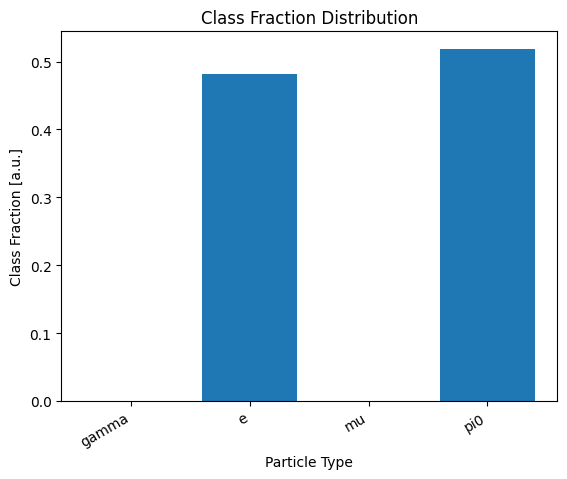

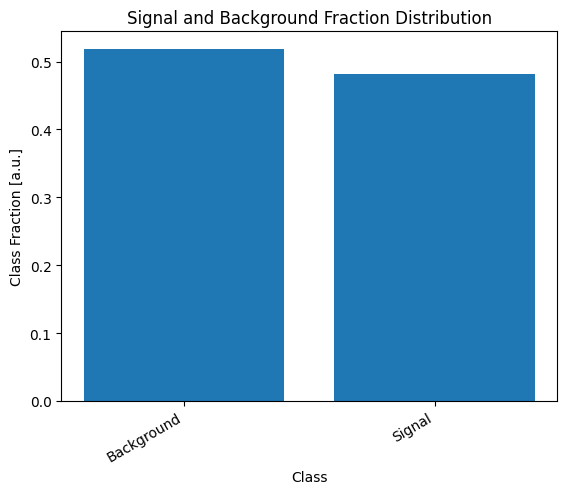

 The best threshold is : 0.4818181818181818


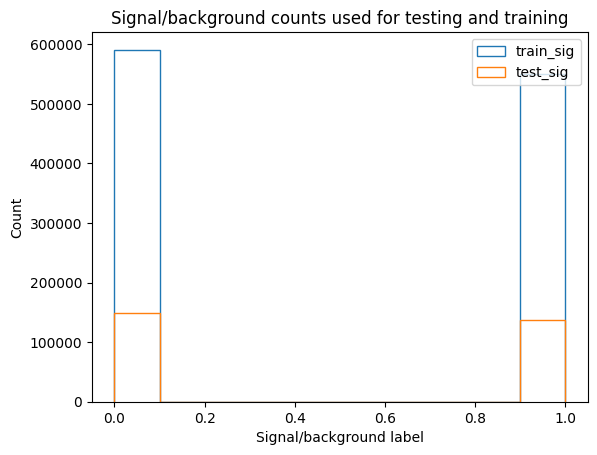

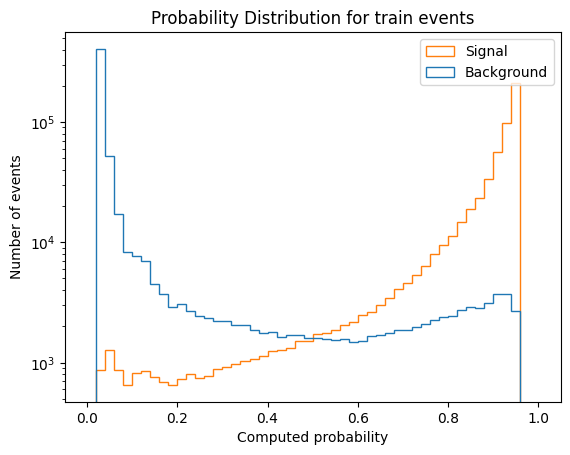

The train accuracy is:0.934719113044866
The train f1 is:0.9340954579696878
The train precision is:0.9095626479375374
The train recall is:0.9599883549555123


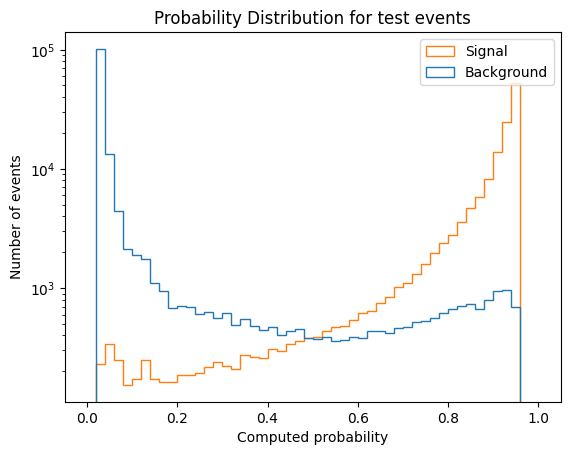

The test accuracy is:0.9342361396087839
The test f1 is:0.9333537122870873
The test precision is:0.9083380609096318
The test recall is:0.9597862479348509
{'pe': 0.053749207930072415, 'ppi0': 0.9455661455777498, 'reco_electron_mom': 0.0006846464921778689}


/home/surajrai1900/IWCD_ParticleGun-analysis/Classification_model.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name + '_sig'] = 0


<Figure size 640x480 with 0 Axes>

In [14]:
# Using only softmax variables for training and testing the model

run_model(df_base, train_col=['pe', 'ppi0', 'reco_electron_mom', 'true_sig'], train_labels = [1, 3])

In [15]:
gbdt_mlepi0_cuts = (df_base['gbdt_sig'].astype(bool))

In [16]:
print(f' Selection Efficiency and background rejection for fitqun cuts is : {utils.sg_eff(df_base, fq_epi0_cuts, 1)} , {utils.bg_rej(df_base, fq_epi0_cuts, 3)}')
print(f' Selection Efficiency and background rejection for softmax cuts is : {utils.sg_eff(df_base, ml_epi0_cuts, 1)} , {utils.bg_rej(df_base, ml_epi0_cuts, 3)}')
print(f" Selection Efficiency and background rejection for gbdt cuts is : {utils.sg_eff(df_base, gbdt_mlepi0_cuts, 1)} , {utils.bg_rej(df_base, gbdt_mlepi0_cuts, 3)}")

 Selection Efficiency and background rejection for fitqun cuts is : 0.7336622065782419 , 0.8173486947486904
 Selection Efficiency and background rejection for softmax cuts is : 0.9536440243362316 , 0.9126017360058877
 Selection Efficiency and background rejection for gbdt cuts is : 0.9599480757127206 , 0.911105459110784


In [17]:
print(f'Precision, recall and f1_score for fitqun cuts is : {utils.f1(df_base, fq_epi0_cuts, 1, 3)}')
print(f'Precision, recall and f1_score for softmax cuts is : {utils.f1(df_base, ml_epi0_cuts, 1, 3)}')
print(f'Precision, recall and f1_score for gbdt cuts is : {utils.f1(df_base, gbdt_mlepi0_cuts, 1, 3)}')

Precision, recall and f1_score for fitqun cuts is : (0.7885791062726282, 0.7336622065782419, 0.7601300559711631)
Precision, recall and f1_score for softmax cuts is : (0.9101711978286019, 0.9536440243362316, 0.931400616981798)
Precision, recall and f1_score for gbdt cuts is : (0.909318369695874, 0.9599480757127206, 0.9339475614552954)


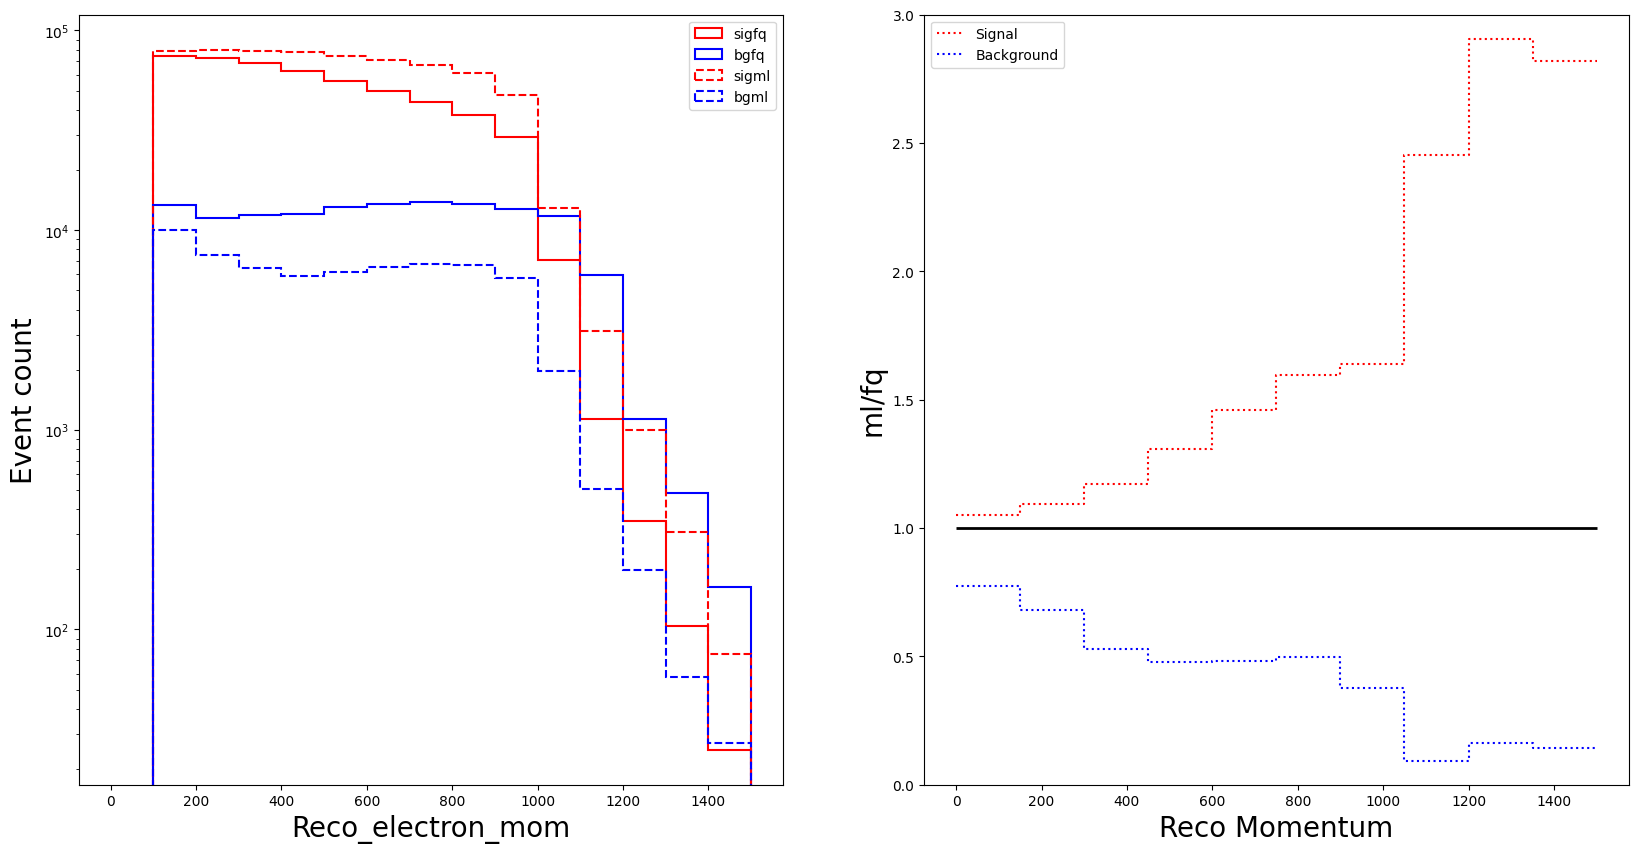

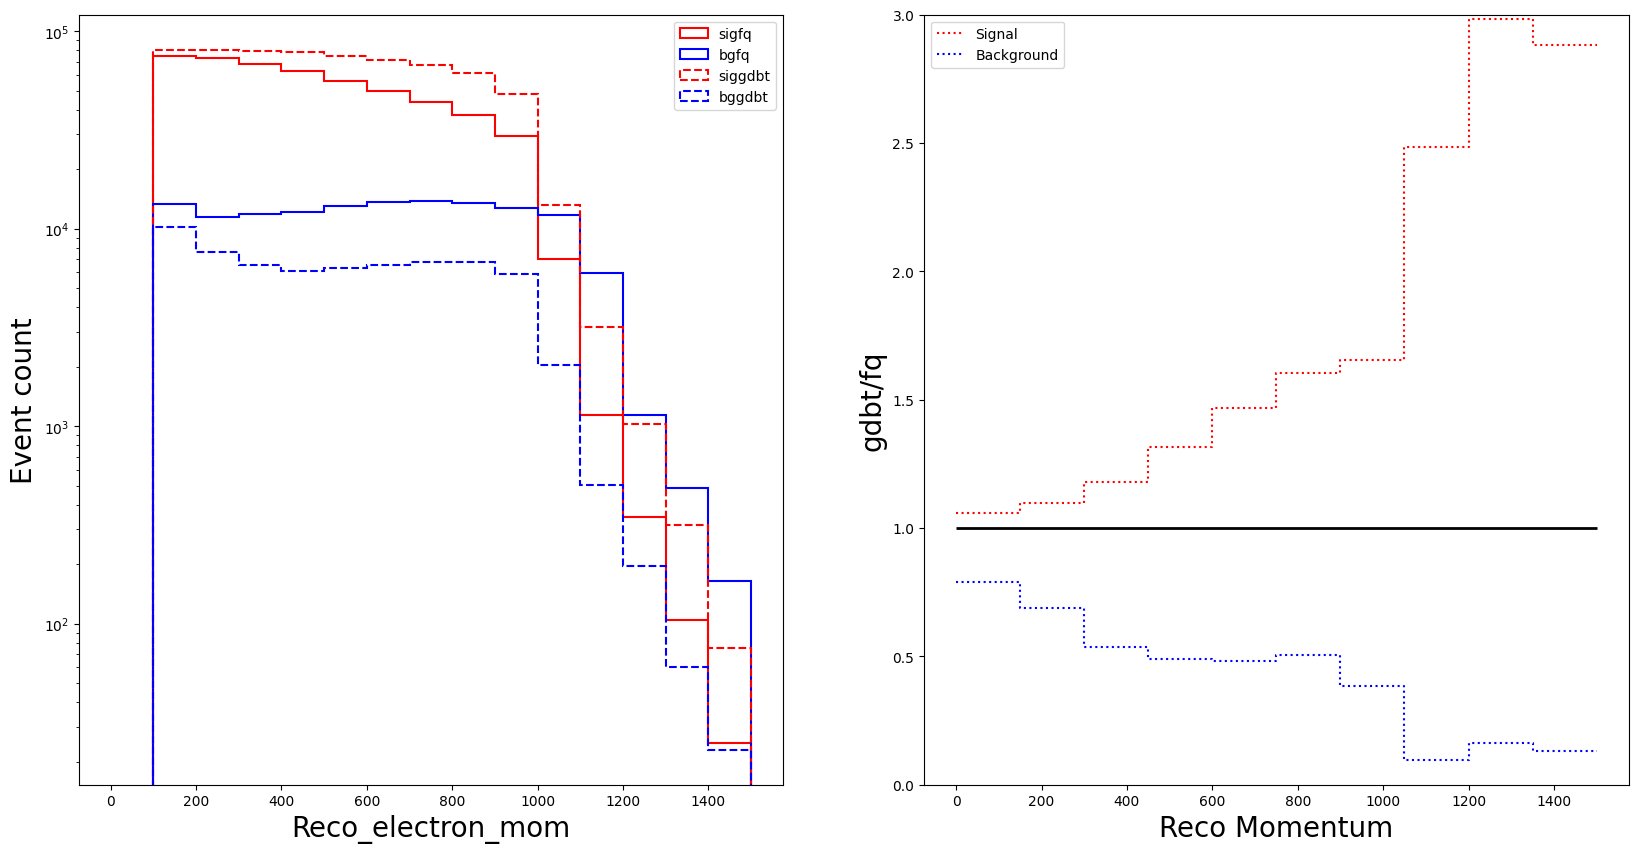

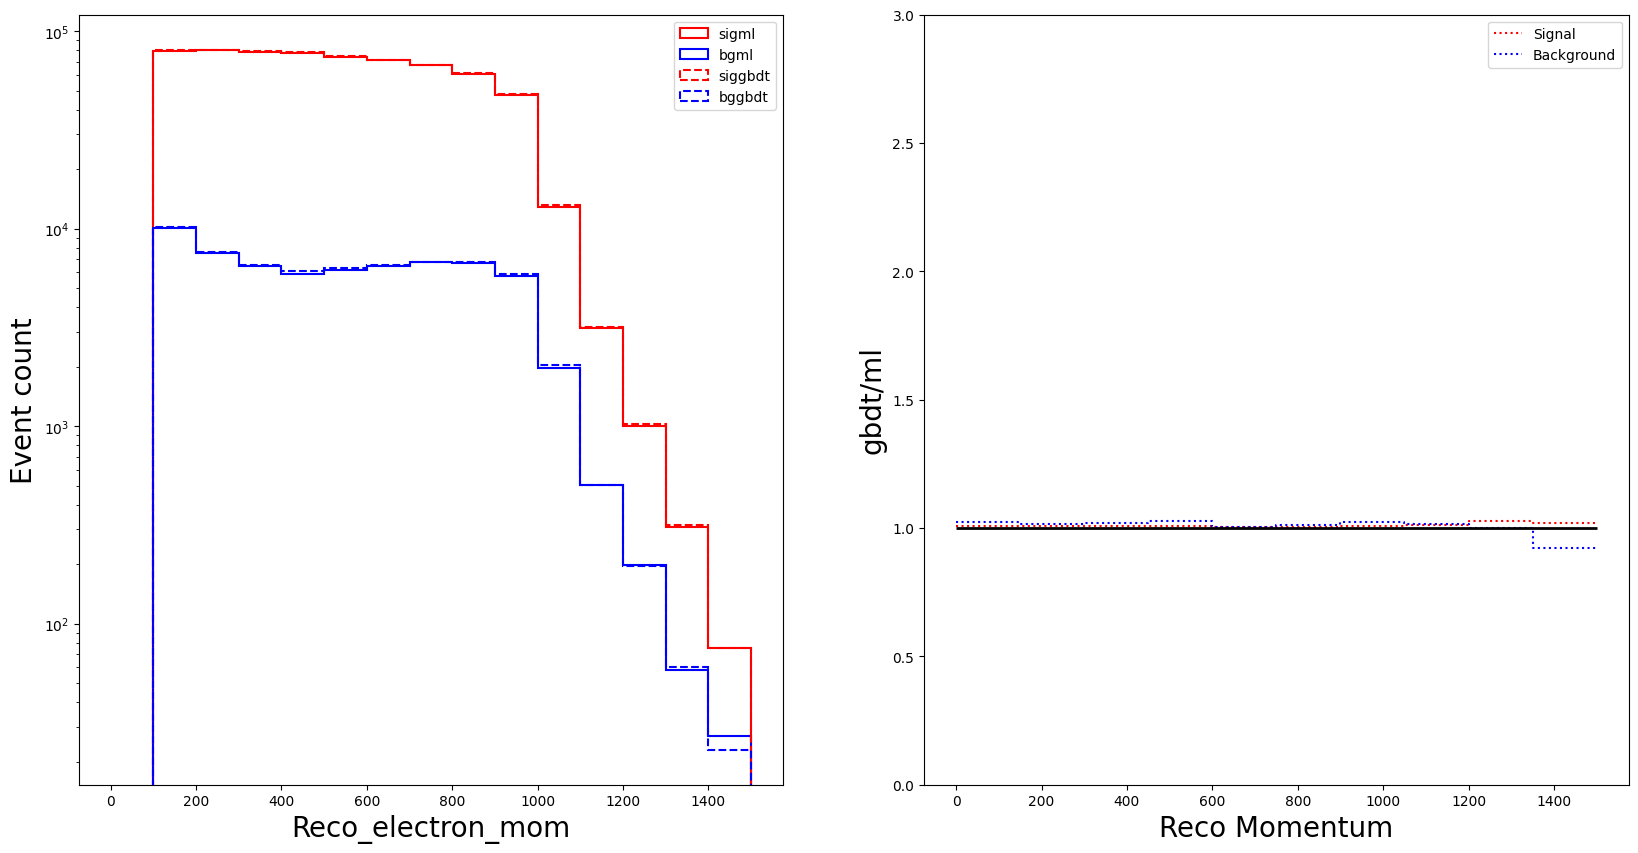

(<Figure size 2000x1000 with 2 Axes>,
 array([<AxesSubplot: xlabel='Reco_electron_mom', ylabel='Event count'>,
        <AxesSubplot: xlabel='Reco Momentum', ylabel='gbdt/ml'>],
       dtype=object))

In [18]:
utils.plot_sel_comp(df_base, 1, 3, fq_epi0_cuts, ml_epi0_cuts, 'fq', 'ml')
utils.plot_sel_comp(df_base, 1, 3, fq_epi0_cuts, gbdt_mlepi0_cuts, 'fq', 'gdbt')
utils.plot_sel_comp(df_base, 1, 3, ml_epi0_cuts, gbdt_mlepi0_cuts, 'ml', 'gbdt')

In [19]:
fq_ml_epi0 = (fq_epi0_cuts & ml_epi0_cuts)

Using gbdt model


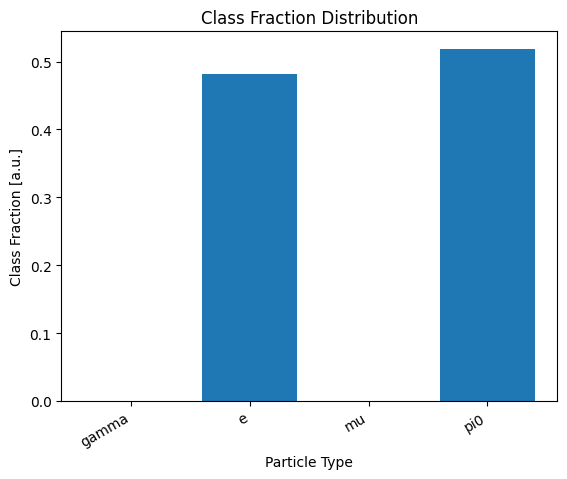

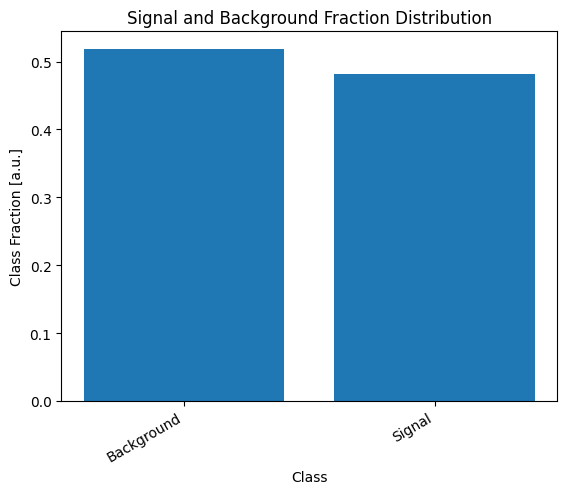

 The best threshold is : 0.5


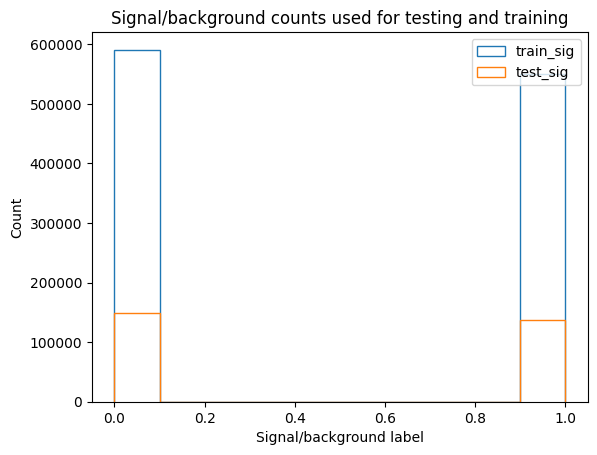

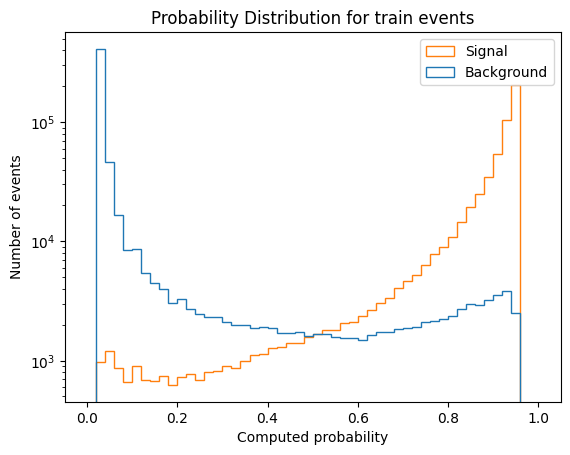

The train accuracy is:0.9352171659910509
The train f1 is:0.9344412272847872
The train precision is:0.9119741302114998
The train recall is:0.9580432686184246


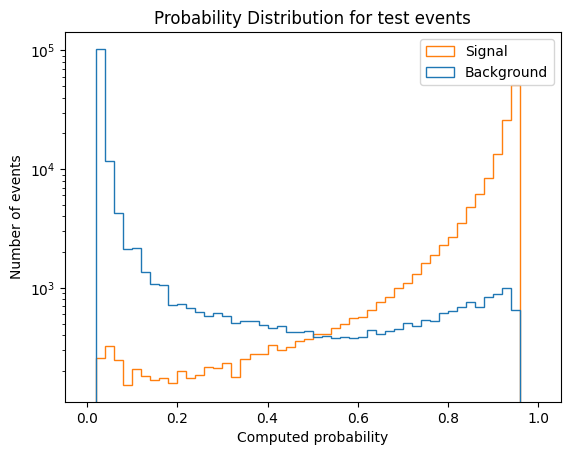

The test accuracy is:0.9348394134214394
The test f1 is:0.933812631818959
The test precision is:0.9107745979679486
The test recall is:0.9580464055441028
{'pe': 0.06565957549229934, 'pi0/e_likelihood ratio': 0.0, 'reco_electron_towall': 6.676680312598917e-06, 'reco_electron_dwall': 1.4764144777985889e-06, 'ppi0': 0.9316820678275768, 'reco_electron_mom': 0.0004888231701005957, 'pi0_mass': 0.002161380415232973}


/home/surajrai1900/IWCD_ParticleGun-analysis/Classification_model.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name + '_sig'] = 0


<Figure size 640x480 with 0 Axes>

In [20]:
# Using both softmax and fiTQun variables for training and testing the model

run_model(df_base, train_col=['pe', 'pi0/e_likelihood ratio', 'reco_electron_towall', 'reco_electron_dwall', 'ppi0', 'reco_electron_mom', 'true_sig', 'pi0_mass'], train_labels = [1, 3])

In [21]:
gbdt_cuts = (df_base['gbdt_sig'].astype(bool))

In [22]:
print(f' Selection Efficiency and background rejection for fq+softmax cuts is : {utils.sg_eff(df_base, fq_ml_epi0, 1)} , {utils.bg_rej(df_base, fq_ml_epi0, 3)}')
print(f" Selection Efficiency and background rejection for gbdt cuts is : {utils.sg_eff(df_base, gbdt_cuts, 1)} , {utils.bg_rej(df_base, gbdt_cuts, 3)}")

 Selection Efficiency and background rejection for fq+softmax cuts is : 0.707622846686403 , 0.9464641326464349
 Selection Efficiency and background rejection for gbdt cuts is : 0.9580438937970582 , 0.9138747889519027


In [23]:
print(f'Precision, recall and f1_score for fq+softmax cuts is : {utils.f1(df_base, fq_ml_epi0, 1, 3)}')
print(f'Precision, recall and f1_score for gbdt cuts is : {utils.f1(df_base, gbdt_cuts, 1, 3)}')

Precision, recall and f1_score for fq+softmax cuts is : (0.9246639366576999, 0.707622846686403, 0.8017136862990103)
Precision, recall and f1_score for gbdt cuts is : (0.9117348148415175, 0.9580438937970582, 0.9343158825004564)


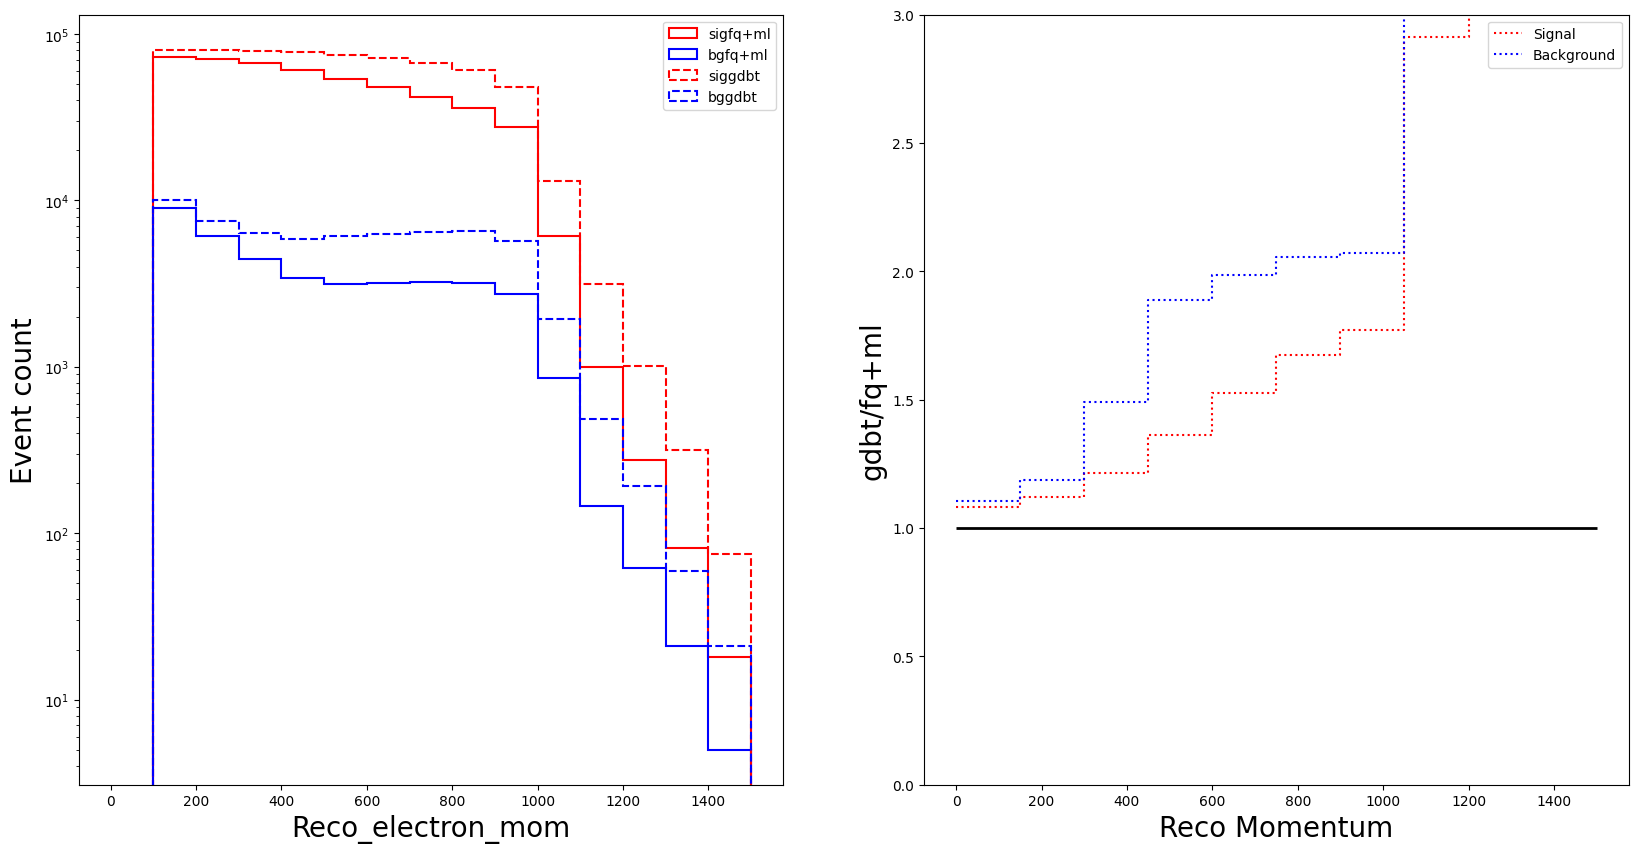

(<Figure size 2000x1000 with 2 Axes>,
 array([<AxesSubplot: xlabel='Reco_electron_mom', ylabel='Event count'>,
        <AxesSubplot: xlabel='Reco Momentum', ylabel='gdbt/fq+ml'>],
       dtype=object))

In [24]:
utils.plot_sel_comp(df_base, 1, 3, fq_ml_epi0, gbdt_cuts, 'fq+ml', 'gdbt')